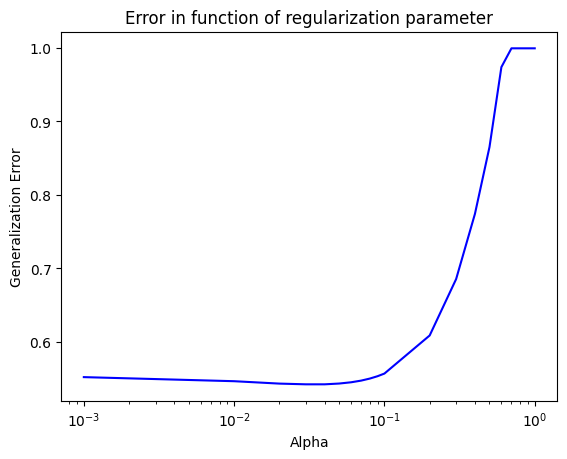

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("data.csv")
df['famhist'] = (df['famhist'] == "Present").astype(int)
df_standard = (df - df.mean())/df.std()
df_standard = df_standard.drop('obesity',axis=1)
X = df_standard.drop('adiposity',axis=1)
y = df_standard['adiposity']
gen_error = []
alphas = []
for a in [0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = Lasso(alpha=a) # Changed to Lasso insteaf of LinearRegression because of using the L1 Regularization
  kf = KFold(n_splits=10,shuffle=True,random_state=27)
  scores= []

  for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    scores.append(mse)
  loss = sum(scores)/len(scores)
  alphas.append(a)
  gen_error.append(loss)

plt.plot(alphas,gen_error,marker='',linestyle='-',color='b')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Generalization Error")
plt.title("Error in function of regularization parameter")
plt.show()